## 라이브러리

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 1.Remark_Numpy

In [20]:
a = np.array([-2.0, -1.0, 0 ,1.0, 2.0])
y = (a >= 0)
print(y)
print(a[y])

[False False  True  True  True]
[0. 1. 2.]


In [24]:
a[y] = 100
print(a)

[ -2.  -1. 100. 100. 100.]


In [85]:
#dot product
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])
z = np.dot(x,y) # z(1,1) = 1*5 + 2*7 = 5 + 14 = 19
                # z(1,2) = 1*6 + 2*8 = 6 + 16 = 22
                # z(2,1) = 3*5 + 4*7 = 15 + 28 = 43
                # z(2,2) = 3*6 + 4*8 = 18 + 32 = 50
print("(2,2) X (2,2) : \n",z)

#(2,3) * (3,2)
x = np.array([[1,2,3],[4,5,6]])
y = np.array([[1,2],[2,3],[3,4]])
z = np.dot(x,y) #z(1,1) = 1*1 + 2*2 + 3*3 = 1 + 4 + 9 = 14
                #z(1,2) = 1*2 + 2*3 + 3*4 = 2 + 6 + 12 = 20
                #...
print(x.shape , "X" , y.shape,'=',z.shape)
print(z)

(2,2) X (2,2) : 
 [[19 22]
 [43 50]]
(2, 3) X (3, 2) = (2, 2)
[[14 20]
 [32 47]]


## 3-2.Activation Function

### 1.Step function

In [32]:
def step_function(x):
    return np.array(x>0 , dtype = np.int)

In [31]:
print(step_function(5))
print(step_function(-5))
print(step_function(0))

1
0
0


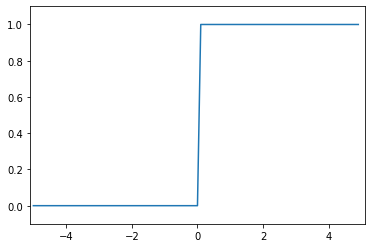

In [49]:
x = np.arange(-5.0 , 5.0 , 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.xlim(-5.1,5.1)
plt.show()

### 2.sigmoid

In [6]:
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y

In [21]:
def sigmoid2(x):
    return 1/(1+np.exp(-2*x))

In [41]:
sigmoid(np.array([-3,0,3]))

array([0.04742587, 0.5       , 0.95257413])

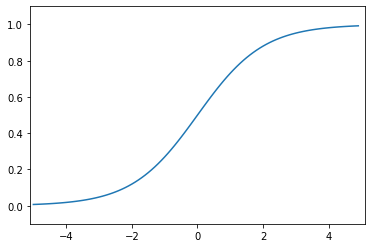

In [75]:
x1 = np.arange(-5.0 , 5.0 , 0.1)
y1 = sigmoid(x1)
plt.plot(x1,y1)
plt.ylim(-0.1,1.1)
plt.xlim(-5.1,5.1)
plt.show()

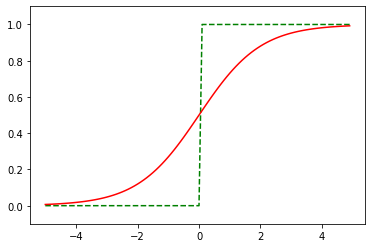

In [55]:
plt.plot(x,y,linestyle = '--',color = 'g')
plt.plot(x1,y1,color = 'r')
plt.ylim(-0.1,1.1)
plt.show()

### 3.Relu

In [18]:
def relu(x):
    return np.maximum(0,x)

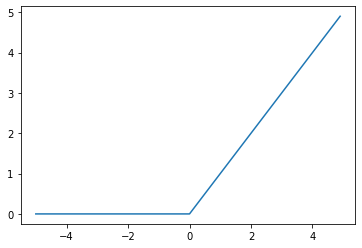

In [77]:
x = np.arange(-5,5,0.1)
y = relu(x)
plt.plot(x,y)
plt.show()

## 3-4. Neural Network

In [8]:
# 2-3-3-2
#input data
X = np.array([0.7 ,2.0])
#first layer
W1 = np.array([[0.3, 0.2, 0.1],[0.6, 0.3, 0.7]])
b1 = np.array([0.1,0.2,0.3])

s1 = np.dot(X,W1) + b1
Z1 = sigmoid(s1)

print("s1 : ",s1)
print("Z1 : ",Z1)
#second
W2 = np.array([[0.4,0.5,0.2],[0.4,0.3,0.1],[0.1,0.2,0.3]])
b2 = np.array([0.2,0.3,0.1])

s2 = np.dot(Z1,W2) + b2
Z2 = sigmoid(s2)

print("\ns2 : ",s2)
print("Z2 : ",Z2)

#output
W3 = np.array([[0.2,0.3],[0.1,0.5],[0.9,0.2]])
b3 = np.array([0.7,0.9])

s3 = np.dot(Z2,W3) + b3
Z3 = sigmoid(s3)

print("\ns3 : ",s3)
print("Z3 : ",Z3)

def softmax(z):
    c = np.max(z) 
    a = np.exp(z-c) #to prevent overflow
    sum_a = np.sum(a)
    return a/sum_a

print("soft_max : " ,softmax(Z3))

s1 :  [1.51 0.94 1.77]
Z1 :  [0.81906121 0.71909966 0.85445767]

s2 :  [0.90071011 1.09615203 0.59205951]
Z2 :  [0.71109541 0.74953842 0.64383755]

s3 :  [1.49662672 1.61686534]
Z3 :  [0.81707082 0.83436237]
soft_max :  [0.49567722 0.50432278]


In [116]:
#function Version
def init_network():
    network = {}
    network["W1"] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network["b1"] = np.array([0.1,0.2,0.3])
    network["W2"] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network["b2"] = np.array([0.1,0.2])
    network["W3"] = np.array([[0.1,0.3],[0.2,0.4]])
    network["b3"] = np.array([0.1,0.2])
    return network

def forward(network,input_data):
    s1 = np.dot(input_data,network["W1"]) + network["b1"]
    z1 = sigmoid(s1)
    s2 = np.dot(z1,network["W2"]) + network["b2"]
    z2 = sigmoid(s2)
    s3 = np.dot(z2,network["W3"]) + network["b3"]
    z3 = sigmoid(s3)
    result = softmax(z3)
    return s3

data = np.array([1.0 ,0.5])
network = init_network()
result = forward(network,data)
print(result)

[0.31682708 0.69627909]


## Example1. MNIST

In [2]:
import sys,os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train,y_train),(x_test,y_test) = load_mnist(flatten= True,normalize = False)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
import pickle
import time

def get_data():
    (x_train,y_train),(x_test,y_test) = load_mnist(flatten= True,normalize = False)
    return x_test,y_test

def init_network():
    with open("sample_weight.pkl",'rb') as f:
        network = pickle.load(f)
    return network

def predict(network,x):
    W1,W2,W3 = network["W1"],network["W2"],network["W3"]
    b1,b2,b3 = network["b1"],network["b2"],network["b3"]
    
    a1 = np.dot(x,W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) + b3
    y = sigmoid(a3)
    
    return y


x,t =get_data()
network = init_network()

batch_size = 100

acc = 0
acc1 = 0

start = time.time()
for i in range(0,len(x)):
    y = predict(network,x[i])
    p = np.argmax(y) #확률이 가장 높은 인덱스 반환
    if p == t[i]:
        acc += 1
t1 = time.time() - start

start = time.time()
for i in range(0,len(x),batch_size):
    #using batch
    x_batch = x[i:i+batch_size]
    y_batch = predict(network,x_batch)
    p = np.argmax(y_batch,axis = 1)
    acc1 += np.sum(p == t[i:i+batch_size])
t2 = time.time() - start

print("Accuracy : " + str(float(acc)/len(x)))
print("time : ",t1)
print("-"*50)
print("Accuracy(batch) : " + str(float(acc1)/len(x)))
print("time(batch) : ",t2)

Accuracy : 0.9207
time :  0.22240543365478516
--------------------------------------------------
Accuracy(batch) : 0.9207
time(batch) :  0.03191494941711426
